In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import constant
import tools

# Load Data

In [ ]:
windmill = pd.read_csv(constant.windmill_path)

In [ ]:
windmill["Slope"] = round(windmill["Slope"],1)
windmill["Roughness"] = round(windmill["Roughness"],2)
windmill["Aspect"] = round(windmill["Aspect"],2)

In [ ]:
windmill_LS = windmill[windmill["Turbine_type"] == "W"][windmill["Placement"] == "LAND"]
windmill_LP = windmill[windmill["Turbine_type"] == "P"][windmill["Placement"] == "LAND"]
windmill_HS = windmill[windmill["Turbine_type"] == "W"][windmill["Placement"] == "HAV"]
windmill_HP = windmill[windmill["Turbine_type"] == "P"][windmill["Placement"] == "HAV"]

### Capacity_kw distribution

In [ ]:
plt.figure(figsize=(25,7))
windmill_LS.groupby("Capacity_kw").count()["GSRN"].plot.bar()

## Geo distribution

In [ ]:
plt.figure(figsize=(25,7))
windmill_LS.groupby("Roughness").count()["GSRN"].plot.bar()

In [ ]:
plt.figure(figsize=(25,7))
windmill_LS.groupby("Slope").count()["GSRN"].plot.bar()

In [ ]:
from sklearn.cluster import MeanShift
pred = MeanShift().fit_predict(windmill_LS[["Slope", "Roughness", "Aspect"]])
pred

In [ ]:
len(pred[pred==0])

In [ ]:
len(pred[pred==1])

In [ ]:
len(pred[pred==2])

In [ ]:
from sklearn.cluster import MeanShift
pred = MeanShift().fit_predict(windmill_LS[["Slope","Roughness"]])
pred

In [ ]:
len(pred[pred==0])

In [ ]:
len(pred[pred==1])

In [ ]:
len(pred[pred==2])

In [ ]:
windmill_LS['pred'] =pd.Series(pred)

In [ ]:
windmill_LS[windmill_LS["pred"] == 0]

In [ ]:
windmill_LS[windmill_LS["Rotor_diameter"]>0.1]

In [ ]:
c = windmill_LS[["Slope","Roughness", "Capacity_kw", "Rotor_diameter", "Navhub_height"]]

In [ ]:
windmill_LS = windmill_LS[~windmill_LS["Rotor_diameter"].isna()]

In [ ]:
windmill_LS.info()

In [ ]:
from pyclustertend import hopkins
from sklearn.preprocessing import MinMaxScaler
test = MinMaxScaler().fit_transform(windmill_LS[["Slope","Roughness", "Capacity_kw", "Rotor_diameter", "Navhub_height","Elevation"]])
hopkins(test, 3909)

In [ ]:
len(test)

In [ ]:
hopkins(test,3910)

### Chose Capacity == 600
The number of sample is 564, 14.4% of total.

In [ ]:
windmill_LW_600 = windmill_LW[windmill_LW["Capacity_kw"] == 600]

In [ ]:
plt.figure(figsize=(25,7))
windmill_LW_600.groupby("Navhub_height").count()["GSRN"].plot.bar()

In [ ]:
windmill_LW_600 = windmill_LW_600[windmill_LW_600["Navhub_height"] == 45]

In [ ]:
plt.figure(figsize=(25,7))
windmill_LW_600.groupby("Rotor_diameter").count()["GSRN"].plot.bar()

In [ ]:
windmill_LW_600 = windmill_LW_600[windmill_LW_600["Rotor_diameter"] == 44]

In [ ]:
cnt = windmill_LW_600.count()["GSRN"]
cnt

In [ ]:
cnt/len(windmill_LW)

### Filter and Clean by basic features

In [ ]:
cols = ["Slope", "Elevation", "Roughness"]

In [ ]:
windmill_LW_600[cols].plot.box()

In [ ]:
windmill_LW_600[cols].describe()

In [ ]:
windmill_LW_600[windmill_LW_600["Roughness"] == 0.1]

In [ ]:
windmill_LW_600[windmill_LW_600["Slope"] == 0]

In [ ]:
windmill_LW_600[windmill_LW_600["grid"] == 773]

In [ ]:
windmill_LW_600[windmill_LW_600["grid"] == 773]

## Choose 570714700000010422
570714700000010422 has the most identity    Capacity_kw 660, Rotor_diameter 44, Navhub_height 45, 
Slope 0, Elevation 2.0    
less weak impact

In [ ]:
windmill_LW_600 = pd.read_csv("data/windmill_LW_600.csv")

In [ ]:
cols = ["GSRN", "Capacity_kw", "Rotor_diameter", "Navhub_height", "Slope", "Roughness", "Elevation", "grid"]
windmill_geo = windmill_LW_600[windmill_LW_600["GSRN"] == 570714700000010422][cols]

In [ ]:
windmill_geo.to_csv("data/windmill_for_geoanalysis.csv", index=False)

In [ ]:
windmill_LW_600.to_csv("data/windmill_LW_600.csv", index=False)

## Windmill LAND and PARK

In [ ]:
windmill_LW = windmill[windmill["Placement"] == "LAND"][windmill["Turbine_type"] == "W"].dropna().reset_index(drop=True)
len(windmill_LW)

In [ ]:
windmill_LP = windmill[windmill["Placement"] == "LAND"][windmill["Turbine_type"] == "P"].reset_index(drop=True)
len(windmill_LP)

In [ ]:
windmill_HW = windmill[windmill["Placement"] == "HAV"][windmill["Turbine_type"] == "W"].dropna().reset_index(drop=True)
len(windmill_HW)

In [ ]:
windmill_HP = windmill[windmill["Placement"] == "HAV"][windmill["Turbine_type"] == "W"].reset_index(drop=True)
len(windmill_HP)

# Geo Impact Analysis

# SpectralClustering
## Clustering of windmills without Geodata

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster.elbow import kelbow_visualizer

In [ ]:
def SpectralClustering_elbow(df,k=(2,10)):
    # df = StandardScaler().fit_transform(df)*3
    # Instantiate the clustering model and visualizer
    kelbow_visualizer(SpectralClustering(random_state=3, assign_labels='discretize'), df, k=k)

In [ ]:
def SpectralClustering_simple(df, k):
    # df = StandardScaler().fit_transform(df)*3
    # Instantiate the clustering model and visualizer
    sc = SpectralClustering(random_state=3, assign_labels='discretize', n_clusters=k)
    cluster = sc.fit_predict(df)
    return cluster

In [ ]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height"]
windmill_c = windmill_LW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c[:,0] =  windmill_c[:,0] * 3
windmill_c[:,1] =  windmill_c[:,1] * 2
windmill_c[:,2] =  windmill_c[:,2] * 2
SpectralClustering_elbow(windmill_c,(2,8))

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 4)
windmill_LW["wm_cluster"] = pd.Series(cluster)
windmill_LW.groupby("wm_cluster")["wm_cluster"].count()

In [ ]:
windmill_c = windmill_HW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c[:,0] =  windmill_c[:,0] * 3
windmill_c[:,1] =  windmill_c[:,1] * 2
windmill_c[:,2] =  windmill_c[:,2] * 2
SpectralClustering_elbow(windmill_c,(2,7))

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 4)
windmill_HW["wm_cluster"] = pd.Series(cluster)
windmill_HW.groupby("wm_cluster")["wm_cluster"].count()

In [ ]:
feat_cols = ["Capacity_kw"]
windmill_c = windmill_LP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c =  windmill_c * 3
SpectralClustering_elbow(windmill_c, (2,7))

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 5)
windmill_LP["wm_cluster"] = pd.Series(cluster)
windmill_LP.groupby("wm_cluster")["wm_cluster"].count()

In [ ]:
windmill_c = windmill_HP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
windmill_c =  windmill_c * 3
SpectralClustering_elbow(windmill_c)

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 3)
windmill_HP["wm_cluster"] = pd.Series(cluster)
windmill_HP.groupby("wm_cluster")["wm_cluster"].count()

## Clustering of windmills with Geodata

In [ ]:
feat_cols = ["Roughness", "Slope", "Elevation"]
windmill_c = windmill_LW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c)

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 5)
windmill_LW["geo_cluster"] = pd.Series(cluster)
windmill_LW.groupby("geo_cluster")["geo_cluster"].count()

In [ ]:
windmill_LW.groupby(["wm_cluster", "geo_cluster"])["GSRN"].count()

In [ ]:
windmill_LW["agg_cluster"] = windmill_LW["wm_cluster"].astype(str) + windmill_LW["geo_cluster"].astype(str)

In [ ]:
windmill_c = windmill_HW[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c,(2,10))

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 3)
windmill_HW["geo_cluster"] = pd.Series(cluster)
windmill_HW.groupby("geo_cluster")["geo_cluster"].count()

In [ ]:
windmill_HW["agg_cluster"] = windmill_HW["wm_cluster"].astype(str) + windmill_HW["geo_cluster"].astype(str)

In [ ]:
windmill_c = windmill_LP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c, (2,14))

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 7)
windmill_LP["geo_cluster"] = pd.Series(cluster)
windmill_LP.groupby("geo_cluster")["geo_cluster"].count()

In [ ]:
windmill_LP["agg_cluster"] = windmill_LP["wm_cluster"].astype(str) + windmill_LP["geo_cluster"].astype(str)

In [ ]:
windmill_LP.groupby(["agg_cluster"])["GSRN"].count()

In [ ]:
windmill_c = windmill_HP[feat_cols]
windmill_c = StandardScaler().fit_transform(windmill_c)
SpectralClustering_elbow(windmill_c)

In [ ]:
cluster = SpectralClustering_simple(windmill_c, 3)
windmill_HP["geo_cluster"] = pd.Series(cluster)
windmill_HP.groupby("geo_cluster")["geo_cluster"].count()

In [ ]:
windmill_HP["agg_cluster"] = windmill_HP["wm_cluster"].astype(str) + windmill_HP["geo_cluster"].astype(str)

In [ ]:
windmill_HP.groupby(["agg_cluster"])["GSRN"].count()

# Meanshift
## Without Geo

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def meanshift_silhouette(df):
    df = StandardScaler().fit_transform(df)
    sc = MeanShift()
    clusters = sc.fit_predict(df)
    silhouette_avg = silhouette_score(df, clusters)
    print(silhouette_avg, len(np.unique(clusters)))
    return clusters

In [ ]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height"]
windmill_c = windmill_LW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
feat_cols = ["Capacity_kw"]
windmill_c = windmill_LP[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HP[feat_cols]
meanshift_silhouette(windmill_c)

## With Geo

In [ ]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height", "Roughness", "Slope"]
windmill_c = windmill_LW[feat_cols]
clusters = meanshift_silhouette(windmill_c)

In [ ]:
windmill_c["Cluster"] = pd.Series(clusters)

In [ ]:
windmill_c.groupby("Cluster")["Cluster"].count()

In [ ]:
windmill_c = windmill_HW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
feat_cols = ["Capacity_kw", "Roughness", "Slope"]
windmill_c = windmill_LP[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HP[feat_cols]
meanshift_silhouette(windmill_c)

### Without Slope

In [ ]:
feat_cols = ["Capacity_kw", "Rotor_diameter", "Navhub_height", "Roughness"]
windmill_c = windmill_LW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HW[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
feat_cols = ["Capacity_kw", "Roughness"]
windmill_c = windmill_LP[feat_cols]
meanshift_silhouette(windmill_c)

In [ ]:
windmill_c = windmill_HP[feat_cols]
meanshift_silhouette(windmill_c)

# SpectralClustering
## Without

In [ ]:
windmill_pd = windmill.toPandas()

In [ ]:
windmill_pd.head(3)

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
feat_cols = ["Turbine_type", "Placement", "Capacity_kw", "Rotor_diameter", "Navhub_height"]
windmill_pd1 = windmill_pd[feat_cols]
windmill_pd1 = StandardScaler().fit_transform(windmill_pd1)

for k in range(5,15):
    sc = SpectralClustering(n_clusters=k,random_state=1,n_init=10)
    clusters = sc.fit_predict(windmill_pd1)

    silhouette_avg = silhouette_score(windmill_pd1, clusters)
    print(k, silhouette_avg)

# SpectralClustering
## With

In [ ]:
feat_cols = ["Turbine_type", "Placement", "Capacity_kw", "Rotor_diameter", "Navhub_height", "roughness"]
windmill_pd1 = windmill_pd[feat_cols]
windmill_pd1 = StandardScaler().fit_transform(windmill_pd1)

for k in range(5,15):
    sc = SpectralClustering(n_clusters=k,random_state=1,n_init=10)
    clusters = sc.fit_predict(windmill_pd1)

    silhouette_avg = silhouette_score(windmill_pd1, clusters)
    print(k, silhouette_avg)

In [ ]:
ttt = pd.read_parquet("data/ITU_DATA/prognosis/ENetNEA/wu_10m.parquet")

In [ ]:
ttt[-110:-55]

# Single Generation/year

In [47]:
windmill = pd.read_csv(constant.windmill_path, dtype={"GSRN":str})
settlement = pd.read_parquet(constant.settlement_2019_path)

In [9]:
VAERDI = pd.merge(windmill, settlement, on="GSRN")[["GSRN", "VAERDI", "TIME_CET"]]

In [14]:
VAERDI["month"] = VAERDI.apply(lambda x: int(x["TIME_CET"][5:7]), axis=1)
VAERDI["hour"] = VAERDI.apply(lambda x: int(x["TIME_CET"][11:13]), axis=1)

In [26]:
VAERDI_year = VAERDI.groupby("GSRN", as_index=False)["VAERDI"].sum()

In [24]:
VAERDI_month = VAERDI.groupby(["month"], as_index=False)["VAERDI"].sum()

In [25]:
VAERDI_hour = VAERDI.groupby(["hour"], as_index=False)["VAERDI"].sum()

<BarContainer object of 12 artists>

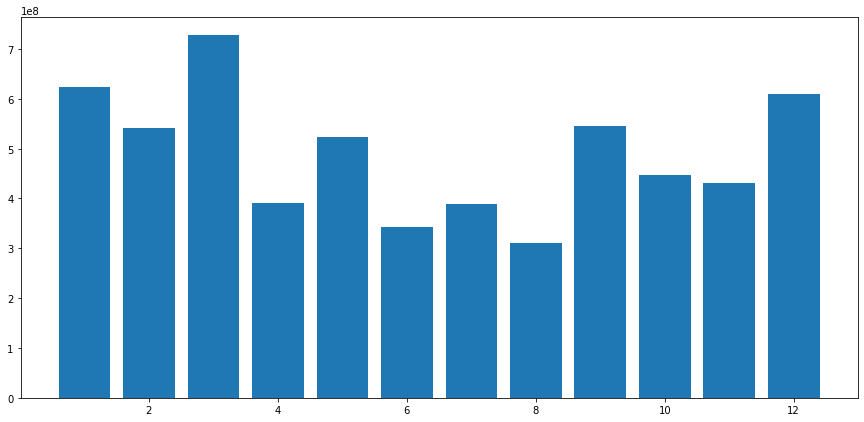

In [30]:
plt.figure(figsize=(15,7))
plt.bar(VAERDI_month["month"],VAERDI_month["VAERDI"])

In [ ]:
settlement = settlement.

In [48]:
windmill_PL = windmill[windmill["Turbine_type"] == "W"][windmill["Placement"] == "LAND"]

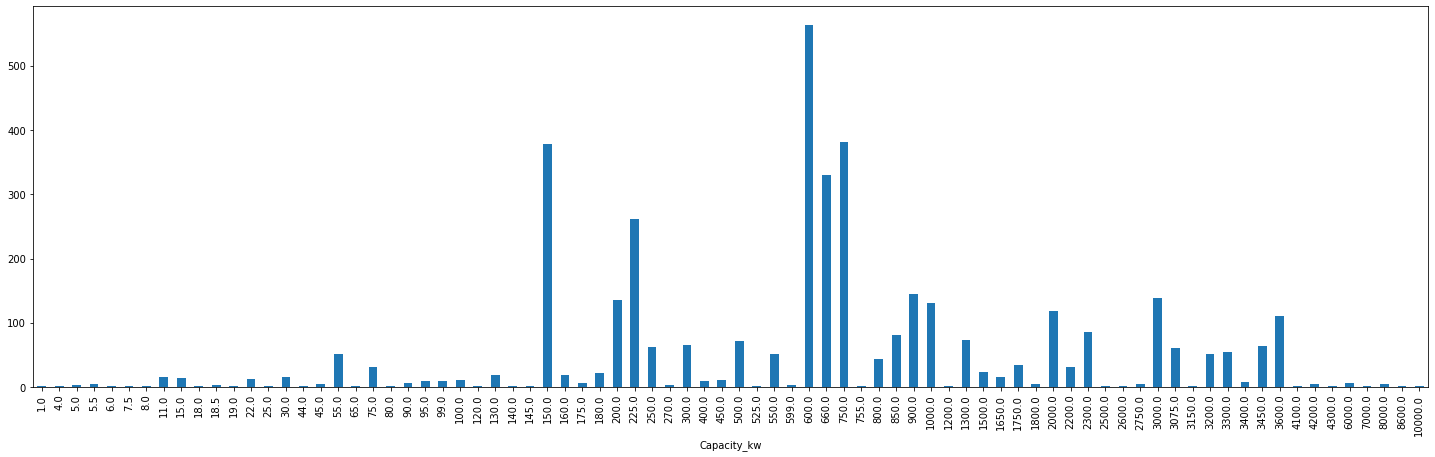

In [49]:
plt.figure(figsize=(25,7))
windmill_PL.groupby(["Capacity_kw"])["GSRN"].count().plot.bar()

In [50]:
windmill_PL = windmill_PL[windmill_PL["Capacity_kw"] == 600]

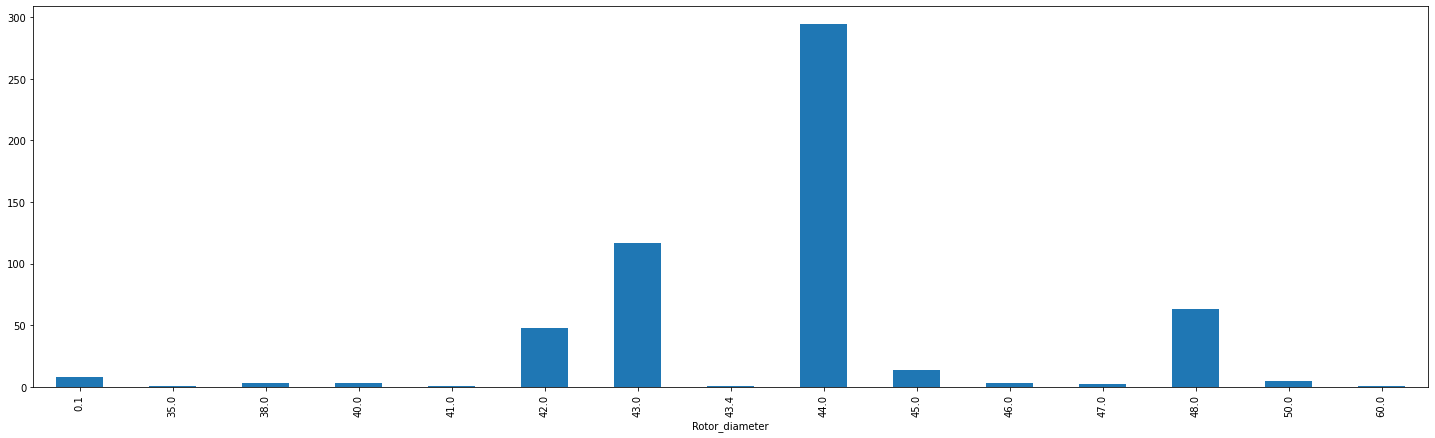

In [51]:
plt.figure(figsize=(25,7))
windmill_PL.groupby(["Rotor_diameter"])["GSRN"].count().plot.bar()

In [52]:
windmill_PL = windmill_PL[windmill_PL["Rotor_diameter"] == 44]

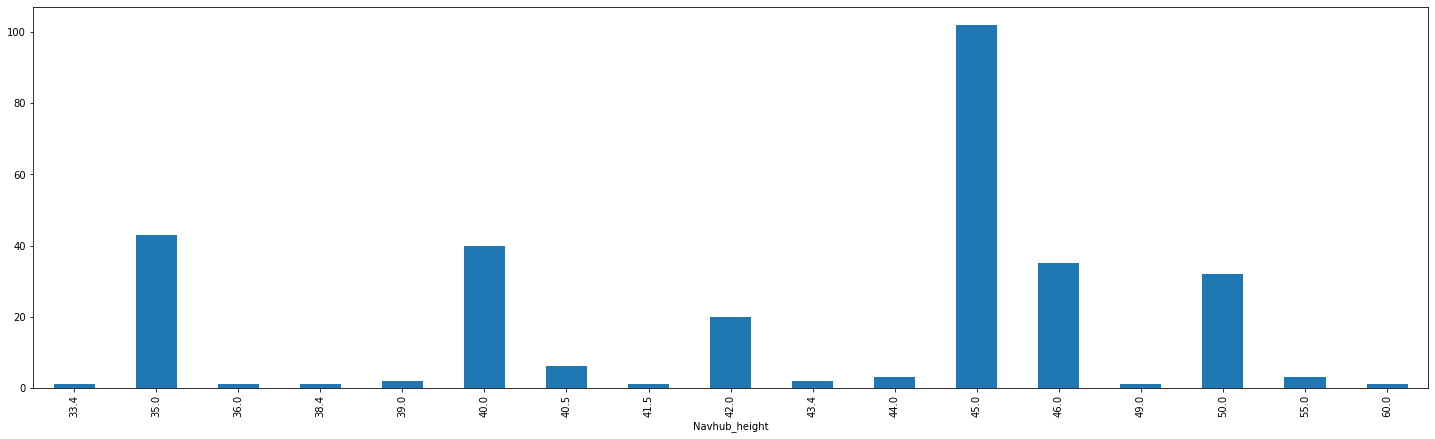

In [53]:
plt.figure(figsize=(25,7))
windmill_PL.groupby(["Navhub_height"])["GSRN"].count().plot.bar()

In [54]:
windmill_PL = windmill_PL[windmill_PL["Navhub_height"] == 45]

In [56]:
test = pd.merge(windmill_PL, settlement, on="GSRN")

In [57]:
test = test.groupby("GSRN", as_index=False)["VAERDI"].max()

In [60]:
test = test.sort_values(["VAERDI"])

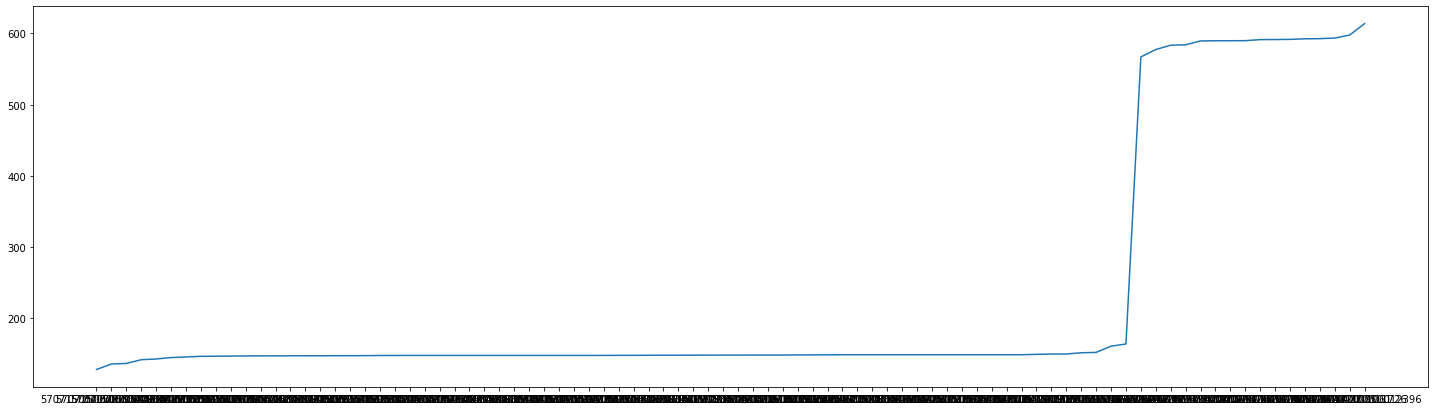

In [65]:
plt.figure(figsize=(25,7))
plt.plot(test["GSRN"], test["VAERDI"])

In [78]:
cols = windmill_PL.columns
windmill_PL_1 = pd.merge(windmill_PL, test[test["VAERDI"]>200], on="GSRN")[cols]

In [79]:
cols = windmill_PL.columns
windmill_PL_2 = pd.merge(windmill_PL, test[test["VAERDI"]<=200], on="GSRN")[cols]

In [84]:
windmill_PL_1.to_csv("data/windmill_SC>200.csv", index=False)
windmill_PL_2.to_csv("data/windmill_SC<200.csv", index=False)

In [85]:
np.unique(windmill_PL_2["grid"])

array([ 898,  900,  941,  985, 1023, 1030, 1106, 1109, 1123, 1124, 1148,
       1149, 1150, 1164, 1190, 1193, 1207, 1236, 1237, 1240, 1244, 1277,
       1278, 1279, 1283, 1285, 1321])

In [87]:
len(windmill_PL_1)

16

<BarContainer object of 24 artists>

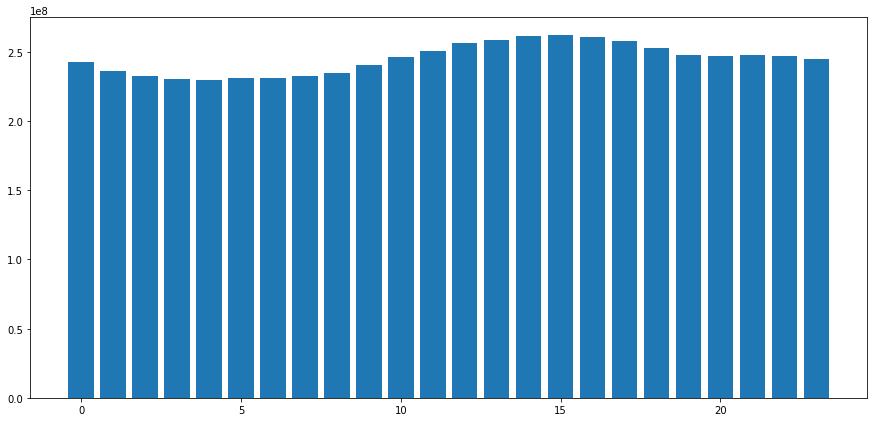

In [32]:
plt.figure(figsize=(25,7))
plt.bar(VAERDI_hour["hour"],VAERDI_hour["VAERDI"])